## Показатели индекса S&P 500:

<div style="border: 3px dotted white; padding: 5px; margin-right: auto;  width: 80%;"> Ссылка на датасет: <a href="https://www.kaggle.com/datasets/whenamancodes/sp-500-stocks">kaggle</a><br>

<b style='color: green;'>Цель</b>: по одному или нескольким параметрам быстро сориентироваться и продать/купить индексный фонд (привязан к индексу S&P 500).<br>
<b style='color: green;'>Гипотеза</b>: в зависимости от объема торгов или цены открытия/закрытия предыдущего <i>месяца*</i> можно сделать вывод о необходимости покупки/продажи фонда.

*Изначально в задании в LMS было слово "дня", однако датасет содержит наблюдения не за каждый день, а за каждый месяц

</div>

In [187]:
# import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
# read the file
df = pd.read_csv("data/sp 500.csv")

In [189]:
# show the head of df
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 01, 2022","3,936.73","4,119.28","3,610.40","3,640.47","3,640.47","88,667,050,000"
1,"Aug 01, 2022","4,112.38","4,325.28","3,954.53","3,955.00","3,955.00","78,088,520,000"
2,"Jul 01, 2022","3,781.00","4,140.15","3,721.56","4,130.29","4,130.29","68,021,140,000"
3,"Jun 01, 2022","4,149.78","4,177.51","3,636.87","3,785.38","3,785.38","86,799,060,000"
4,"May 01, 2022","4,130.61","4,307.66","3,810.32","4,132.15","4,132.15","89,128,130,000"


####  Задание № 1.a
<i>Проверьте типы данных колонок и приведите их к нужному типу (например, даты к типу datetime).</i>

In [190]:
# check types of columns
df.dtypes

Date         object
Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
dtype: object

In [191]:
def str_to_float(col: pd.Series) -> pd.Series:
    """
    Convert column type of string to float
    """
    col = col.apply(lambda x: x.replace(",", "")).astype(float)
    return col

In [192]:
# adjust type of columns
df["Date"] = pd.to_datetime(df["Date"])
for col in df.columns:
    if col != "Date":
        df[col] = str_to_float(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       453 non-null    datetime64[ns]
 1   Open       453 non-null    float64       
 2   High       453 non-null    float64       
 3   Low        453 non-null    float64       
 4   Close      453 non-null    float64       
 5   Adj Close  453 non-null    float64       
 6   Volume     453 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 24.9 KB


####  Задание № 1.b
<i>Проверьте наличие пропущенных значений и обработайте их (например, заполните по какому-либо принципу или удалите строки с пропущенными значениями).</i>

In [193]:
## check nan values - > there is no nan values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       453 non-null    datetime64[ns]
 1   Open       453 non-null    float64       
 2   High       453 non-null    float64       
 3   Low        453 non-null    float64       
 4   Close      453 non-null    float64       
 5   Adj Close  453 non-null    float64       
 6   Volume     453 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 24.9 KB


####  Задание № 1.c
<i>Проверьте данные на наличие дубликатов, и, если необходимо, вычистите их.</i>

In [194]:
# # check duplicates
df.nunique()  # - there is no duplicates in Date column, other columns may be dublicates in some cases

Date         453
Open         451
High         453
Low          452
Close        450
Adj Close    450
Volume       452
dtype: int64

####  Задание № 2
 <i>Рассчитайте основные статистические показатели для числовых переменных, такие как среднее, медиана и стандартное отклонение. Другие статистические показатели также могут быть рассчитаны в зависимости от конкретных целей и задач анализа данных. Сделайте вывод по результатам.</i>

In [195]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,453,453.000000,453.000000,453.000000,453.000000,453.000000,4.530000e+02
mean,2003-10-31 19:17:05.165562880,1318.239272,1363.202274,1271.566932,1325.109029,1325.109029,4.340568e+10
min,1985-01-01 00:00:00,167.200000,180.270000,163.360000,179.630000,179.630000,1.860160e+09
25%,1994-06-01 00:00:00,462.690000,471.290000,454.360000,463.560000,463.560000,6.152870e+09
50%,2003-11-01 00:00:00,1144.940000,1190.580000,1106.420000,1147.390000,1147.390000,2.998151e+10
75%,2013-04-01 00:00:00,1569.180000,1597.570000,1536.030000,1597.570000,1597.570000,7.584851e+10
max,2022-09-01 00:00:00,4778.140000,4818.620000,4560.000000,4766.180000,4766.180000,1.618436e+11
std,NaN,1000.221795,1035.104238,962.091777,1002.905691,1002.905691,3.769421e+10


**Вывод**: Не наблюдаются выбросы значений

####  Задание № 3
<i>Постройте графики, которые считаете наиболее релевантными для анализа данных. Графики должны быть информативными и помочь вам лучше понять данные. При необходимости введите дополнительные колонки в исходный датафрейм.</i>

<i> После построения графиков проанализируйте полученные результаты и сделайте выводы (например, какие данные имеют наибольшую значимость, какие переменные влияют на результаты). Если это необходимо доработайте с данными на этом этапе.</i>

In [196]:
# Отсортируем датасет по датам
df_sorted = df.sort_values(by="Date").reset_index(drop=True)
df_sorted.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,167.20,180.27,163.36,179.63,179.63,2.673710e+09
1,1985-02-01,179.63,183.95,177.75,181.18,181.18,2.194620e+09
2,1985-03-01,181.18,183.89,176.53,180.66,180.66,2.153090e+09
3,1985-04-01,180.66,183.61,177.86,179.83,179.83,1.981880e+09
4,1985-05-01,179.83,189.98,178.35,189.55,189.55,2.350340e+09


Сначала необходимо создать целевую переменную: а именно разницу между закрытием и открытием в этот месяц, что будет стимулом для покупки/продажи

In [197]:
df_sorted["Diff"] = df_sorted["Close"] - df_sorted["Open"]
df_sorted.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Diff
0,1985-01-01,167.20,180.27,163.36,179.63,179.63,2.673710e+09,12.43
1,1985-02-01,179.63,183.95,177.75,181.18,181.18,2.194620e+09,1.55
2,1985-03-01,181.18,183.89,176.53,180.66,180.66,2.153090e+09,-0.52
3,1985-04-01,180.66,183.61,177.86,179.83,179.83,1.981880e+09,-0.83
4,1985-05-01,179.83,189.98,178.35,189.55,189.55,2.350340e+09,9.72


Теперь необходимо сдвинуть все колонки, кроме Diff и Date на один месяц вперед. Таким образом: в каждом наблюдении у нас будет текущий месяц, показатели за прошлый месяц, и разница в стоках за текущий месяц.

Сначала убедимся, что у нас дата непрерывно растет по одному месяцу:

In [198]:
df_sorted.Date.dt.month.diff().value_counts()

Date
 1.0     415
-11.0     37
Name: count, dtype: int64

In [199]:
columns_to_shift = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
for col in columns_to_shift:
    df_sorted[col] = df_sorted[col].shift(1)
    df_sorted.rename(columns={col: col + "_prevmonth"}, inplace=True)
df_sorted.head()

,Date,Open_prevmonth,High_prevmonth,Low_prevmonth,Close_prevmonth,Adj Close_prevmonth,Volume_prevmonth,Diff
0,1985-01-01,NaN,NaN,NaN,NaN,NaN,NaN,12.43
1,1985-02-01,167.20,180.27,163.36,179.63,179.63,2.673710e+09,1.55
2,1985-03-01,179.63,183.95,177.75,181.18,181.18,2.194620e+09,-0.52
3,1985-04-01,181.18,183.89,176.53,180.66,180.66,2.153090e+09,-0.83
4,1985-05-01,180.66,183.61,177.86,179.83,179.83,1.981880e+09,9.72


In [200]:
df_sorted = df_sorted.iloc[1:, :].reset_index(drop=True)
df_sorted

,Date,Open_prevmonth,High_prevmonth,Low_prevmonth,Close_prevmonth,Adj Close_prevmonth,Volume_prevmonth,Diff
0,1985-02-01,167.20,180.27,163.36,179.63,179.63,2.673710e+09,1.55
1,1985-03-01,179.63,183.95,177.75,181.18,181.18,2.194620e+09,-0.52
2,1985-04-01,181.18,183.89,176.53,180.66,180.66,2.153090e+09,-0.83
3,1985-05-01,180.66,183.61,177.86,179.83,179.83,1.981880e+09,9.72
4,1985-06-01,179.83,189.98,178.35,189.55,189.55,2.350340e+09,2.30
...,...,...,...,...,...,...,...,...
447,2022-05-01,4540.32,4593.45,4124.28,4131.93,4131.93,7.478485e+10,1.54
448,2022-06-01,4130.61,4307.66,3810.32,4132.15,4132.15,8.912813e+10,-364.40
449,2022-07-01,4149.78,4177.51,3636.87,3785.38,3785.38,8.679906e+10,349.29
450,2022-08-01,3781.00,4140.15,3721.56,4130.29,4130.29,6.802114e+10,-157.38


#### Построим график зависимостей

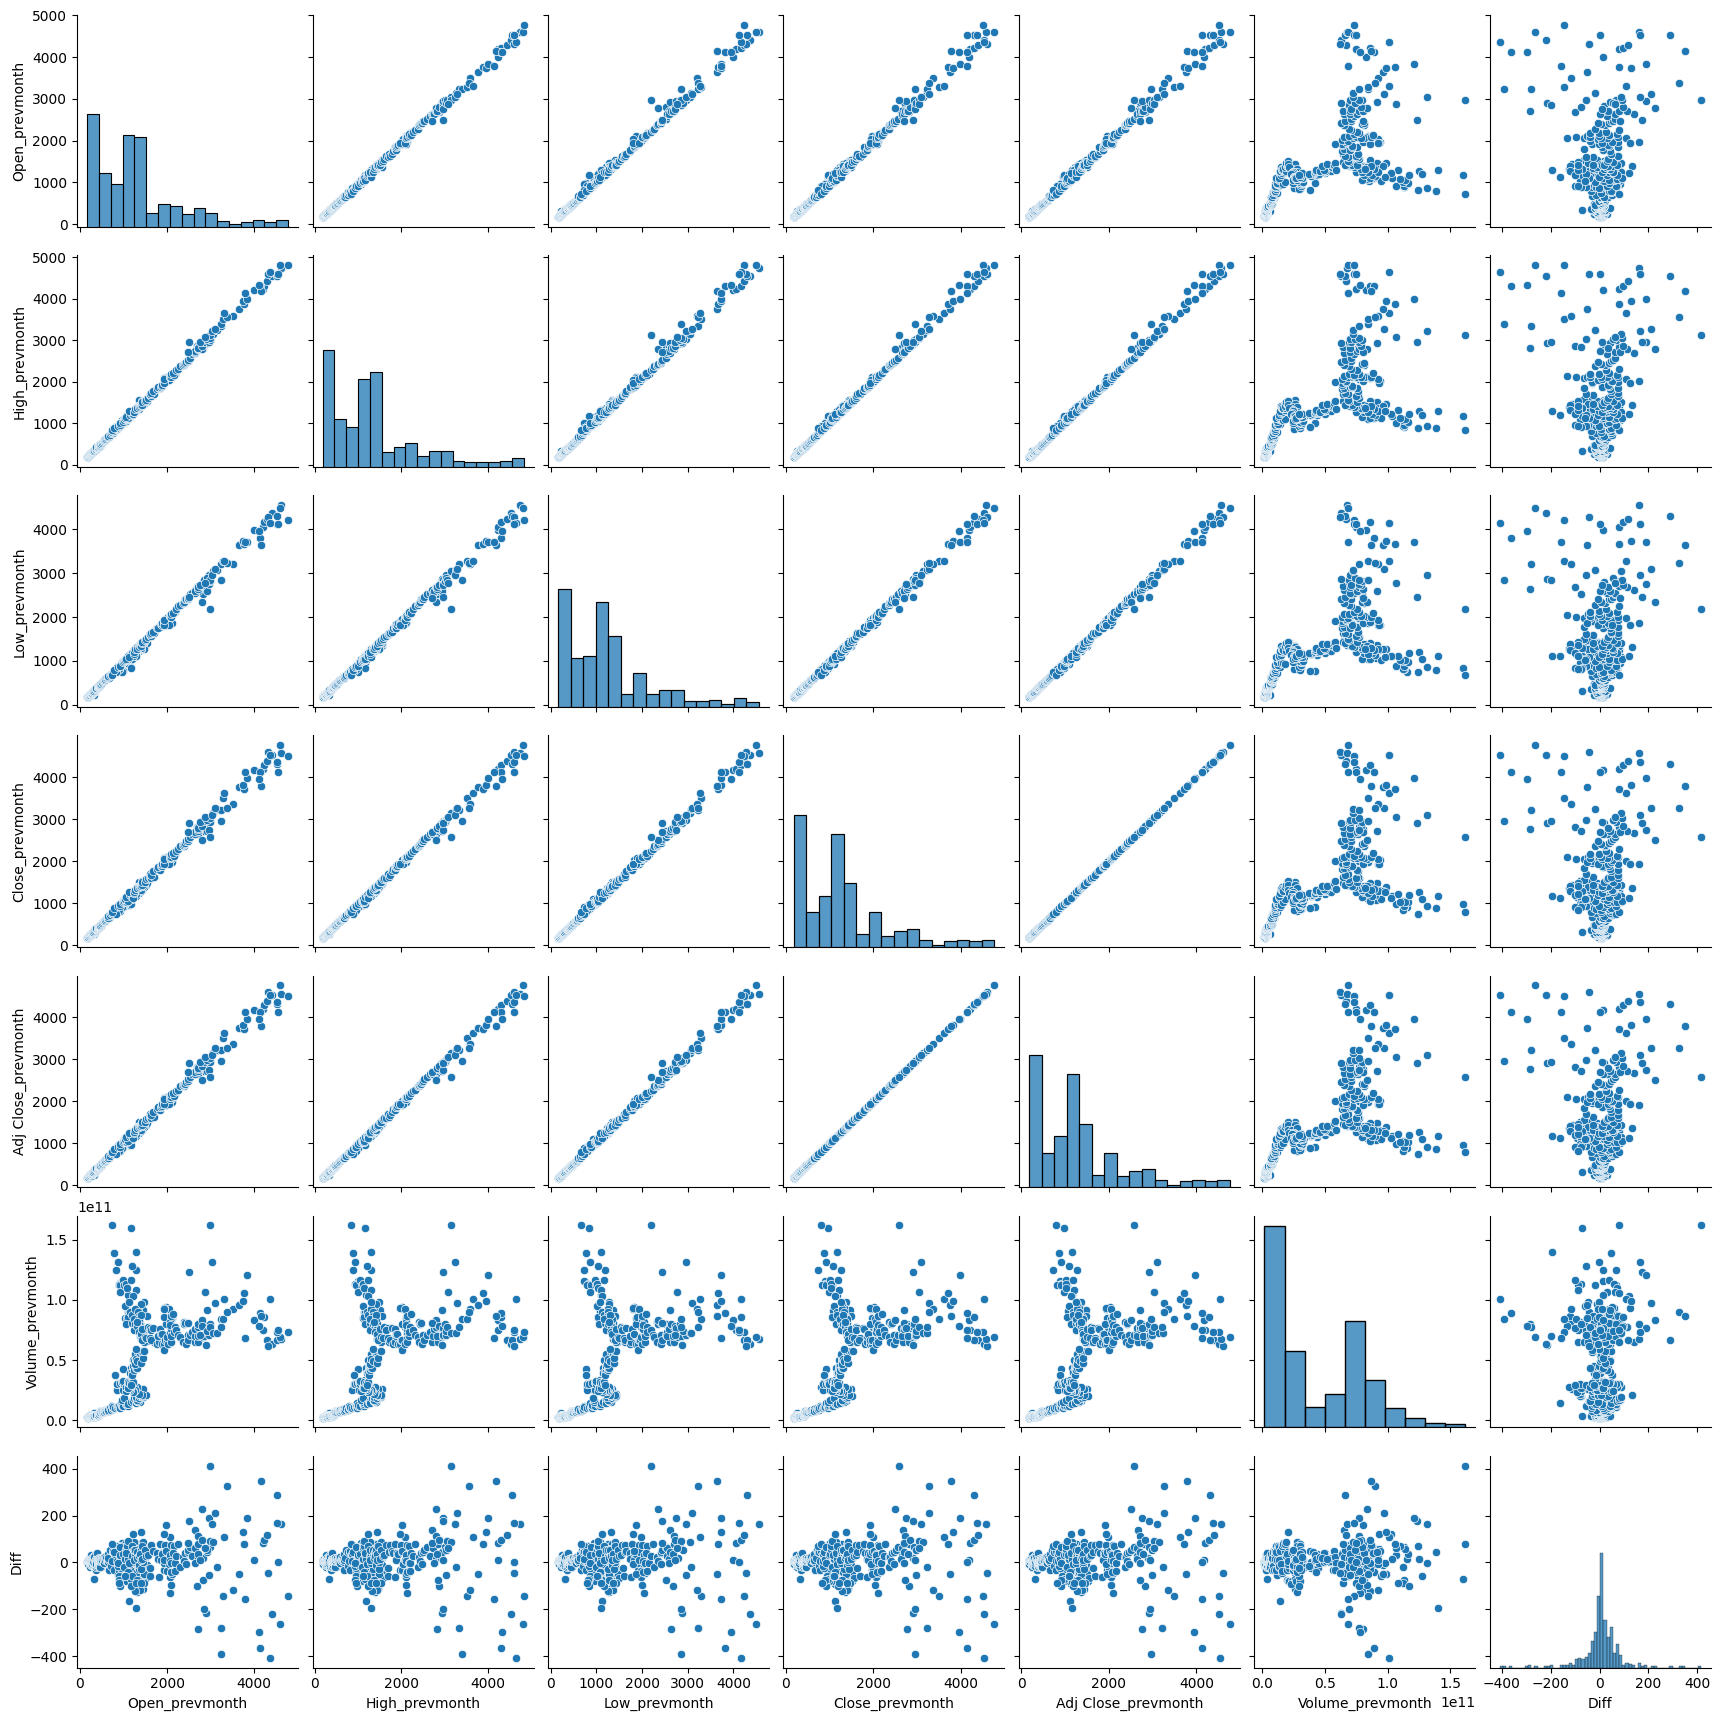

In [201]:
sns.pairplot(df_sorted)

##### Также посмотрим на распределение значений целевого признака

<Axes: xlabel='Diff'>

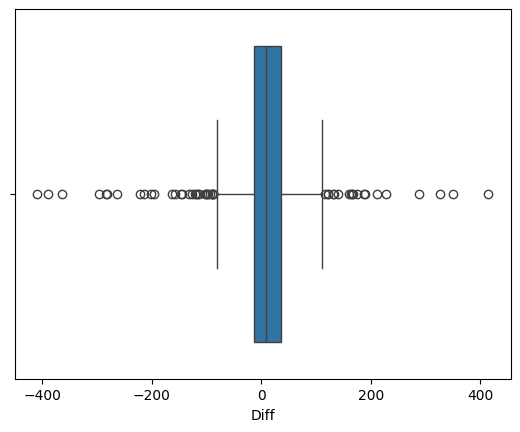

In [202]:
sns.boxplot(df_sorted, x="Diff")

**Данные равномерны и не наблюдается отклонение в какую-либо сторону**

####  Задание № 4
<i> Вычислите матрицу корреляции и постройте heatmap для нее. Сделайте выводы о взаимосвязях, обнаруженных в данных.</i>

<Axes: >

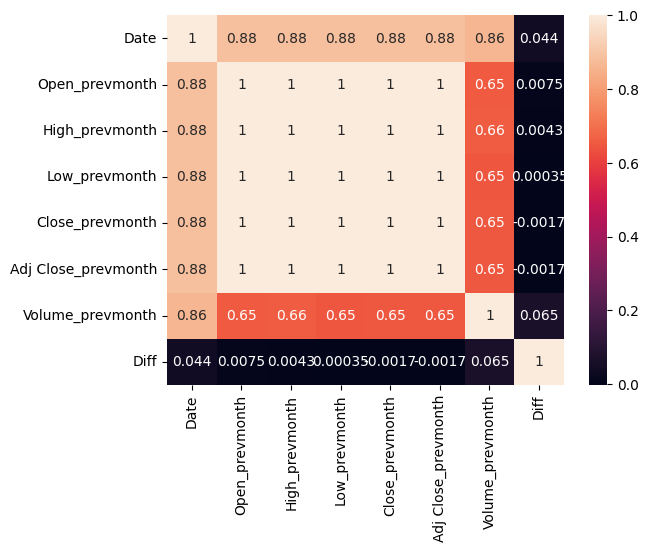

In [203]:
sns.heatmap(df_sorted.corr(), annot=True)

##### По графику pairplot, а также по матрице корреляций можем посмотреть, что целевая переменная не так явно коррелирует с исходными признаками. Попробуем создать новые признаки

## Feature Engineering

In [204]:
# создадим признак: разницу между стоками в прошлом месяце
df_sorted["Diff_prevmonth"] = df_sorted["Close_prevmonth"] - df_sorted["Open_prevmonth"]

In [205]:
# создадим признак: месяц года
df_sorted["Month"] = df_sorted["Date"].dt.month

**Попробуем снова построить матрицу корреляций**

<Axes: >

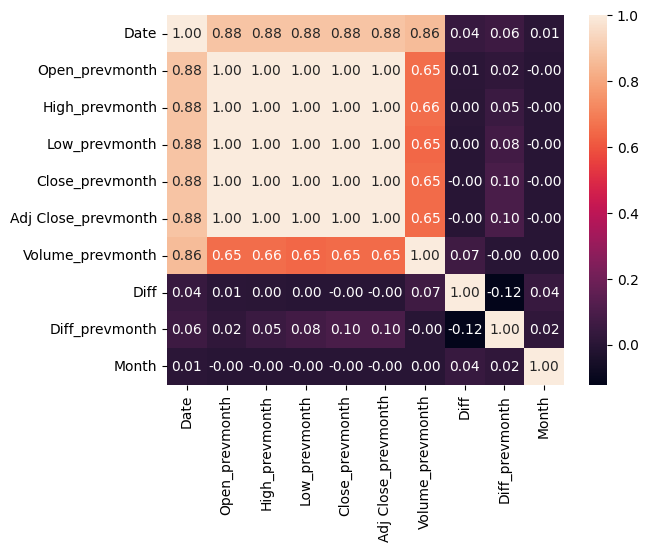

In [206]:
sns.heatmap(df_sorted.corr(), annot=True, fmt=".2f")

Значения коэффициентов корреляции между целевым признаком "Разница цены акций в этом месяце" и другими признаками малы.

#### Задание № 5
<i>Сделайте общий вывод по исследуемому датасету. Предложите возможные способы применения полученных результатов анализа данных.</i>

**Из анализа данных и графиков можно заключить**: что Гипотеза "В зависимости от объема торгов или цены открытия/закрытия предыдущего месяца можно сделать вывод о необходимости покупки/продажи фонда" <span style="color: red;">не подверждена</span>. 

Тем не менее в рамках обучающей практики попробуем обучить модели различных типов и построить регрессию. В конце можно будем измерить качество регрессий по метрике R2.

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

y = df_sorted["Diff"]
X = df_sorted.drop(["Diff", "Date"], axis=1)

models = {
    "lr": LinearRegression,
    "rf": RandomForestRegressor,
    "gb": GradientBoostingRegressor,
}
scores = []
niter = 100
for name, model in models.items():
    regr = model()
    for i in range(niter):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
        regr.fit(X_train, y_train)
        predict_test = regr.predict(X_test)
        score = r2_score(y_test, predict_test)
        scores.append([name, score])

scores_df = pd.DataFrame(scores).rename(columns={0: "Model", 1: "R2Score"})

scores_df.groupby("Model")["R2Score"].mean()

Model
gb   -0.343598
lr   -0.158277
rf   -0.264672
Name: R2Score, dtype: float64

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;"><b>Вывод</b>:
Результаты подсчета средних метрик ожидаемо показали "плохие" значения. Что говорит о том, что текущие признаки (показатели торгов за прошлый месяц) <b>не позволяют предсказать значение целевого параметра</b> (разницу в ценах акций между закрытием и открытием торгов в текущем месяце). </div>